# Grab land cover for a given parcel
*Resource: https://developers.arcgis.com/python/guide/raster-analysis-advanced-concepts/*

Say you want to grab land cover data for a specific location, but you don't want to download the entire NLCD dataset to do that. The ArcGIS Python API can help!

Here I present an example of doing just that. The steps involve:
* Prepping for the analysis: importing modules and authenticating our arcgis session
* Locating the land cover data and creating a layer from the data

### Prepping for analysis: importing and authenticating
* Import the the arcgis `GIS` module. We're going to do some geocoding so we need to create the arcgis `geocoding` module as well. Lastly, enable the Jupyter `display` object

In [12]:
#Import the GIS object.  and display modules
from arcgis import GIS, geometry
from arcgis.geocoding import geocode
from IPython.display import display, Image

In [2]:
#Create the GIS object, authenticating with your ArcGIS Pro account
gis = GIS('pro')

In [3]:
#Search for land cover and print the number of results
lc_results = gis.content.search("NLCD 2011, owner:esri",item_type='image',outside_org=True)


<Item title:"USA NLCD Land Cover 2011" type:Imagery Layer owner:esri>
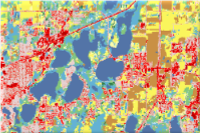

In [4]:
#Get the second result and show it's info box in our notebook
lc_item = lc_results[1]
lc_item

In [5]:
#Extract the image service's spatial reference to a variable
lc_sr = lc_item.spatialReference
lc_sr

'102100'

In [59]:
#Extract the one (and only) layer in the item to a new variable and display it
lc_lyr = lc_item.layers[0]

## Subsetting our image


In [87]:
#Get properties of the layer
outSR = lc_item.spatialReference
xPixelSize = lc_lyr.properties.pixelSizeX
yPixelSize = lc_lyr.properties.pixelSizeY
outSR, xPixelSize, yPixelSize

('102100', 29.99999618963752, 29.999999999985032)

In [133]:
#Set the extent
my_extent = {'xmin': -79.15,
             'ymin': 35.95,
             'xmax': -78.95,
             'ymax': 36.15}
xPoly = geometry.Envelope(my_extent)

In [134]:
#Project the extent to the output SR
myExtent2 = geometry.project([xPoly],4326,outSR)[0]
myExtent2

{'xmin': -8810937.696287604,
 'ymin': 4293743.628389976,
 'xmax': -8788673.798128948,
 'ymax': 4321280.81856613}

In [135]:
#Compute out dimensions
xSize = int(abs((myExtent2.xmax - myExtent2.xmin) / lc_lyr.properties.pixelSizeX))
ySize = int(abs((myExtent2.ymax - myExtent2.ymin) / lc_lyr.properties.pixelSizeY))
xSize,ySize

(742, 917)

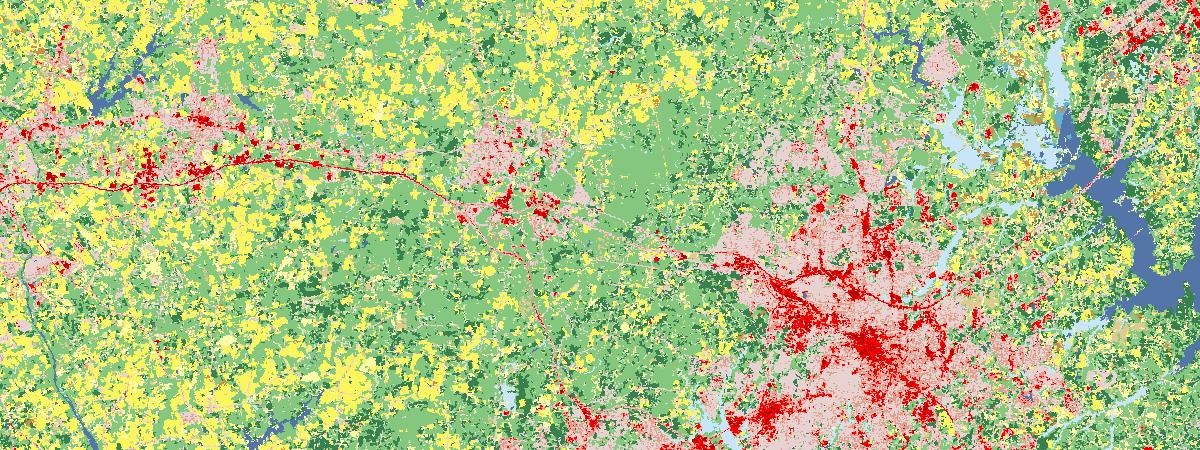

In [136]:
lc_lyr.extent =  myExtent2
lc_lyr

In [139]:
img = lc_lyr.export_image(bbox=myExtent2,
                          size=[xSize,ySize],#[500,450],
                          f='image')
img.

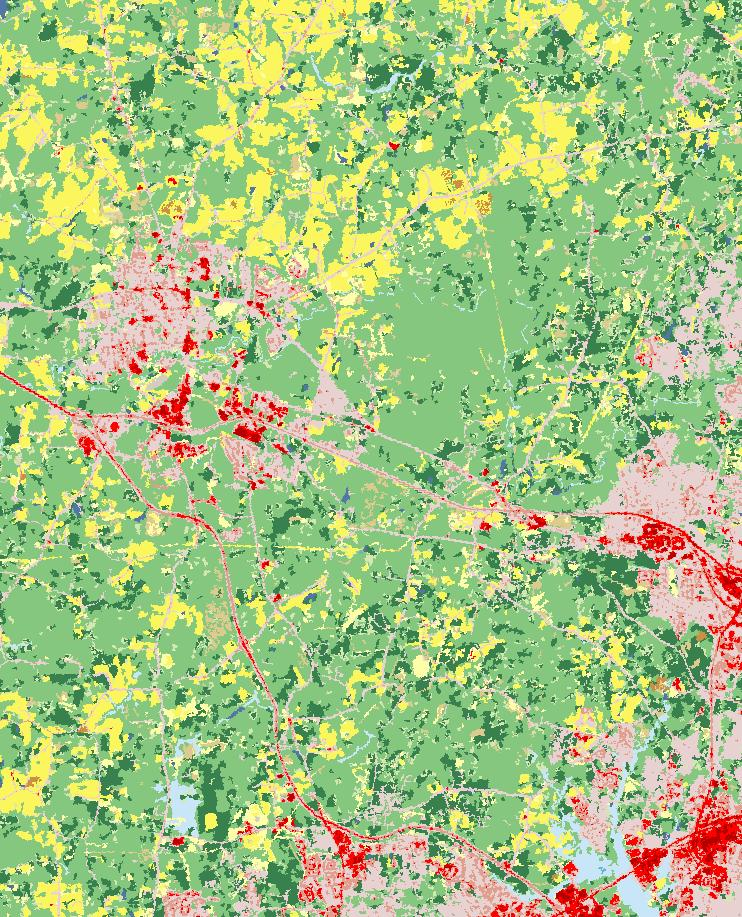

In [137]:
Image(img)

https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.raster.toc.html?highlight=export_image#imagerylayer

In [142]:
savedimg = lc_lyr.export_image(bbox=myExtent2,
                               f='image', 
                               save_folder='.', 
                               save_file='img.tif',
                               size=[xSize,ySize],
                               export_format='tiff',
                               compression_quality=100
                              )

In [117]:
savedimg['href']

'https://landscape10.arcgis.com/arcgis/rest/directories/arcgisoutput/USA_NLCD_Land_Cover_2011_ImageServer/x_____xqmCK9X7n8Q6sueiBso4lag..x_____x_ags_5b9c0627_dcef_467b_997e_7ac1308f4106.tif'

In [141]:
savedimg

{'href': 'https://landscape10.arcgis.com/arcgis/rest/directories/arcgisoutput/USA_NLCD_Land_Cover_2011_ImageServer/x_____xjlXpw4Sr2xYuEtdcLJCzkA..x_____x_ags_8f971766_7471_4f8d_bf5d_b0e04a2cad4c.tif',
 'width': 742,
 'height': 917,
 'extent': {'xmin': -8810946.747813893,
  'ymin': 4293743.628389976,
  'xmax': -8788664.746602654,
  'ymax': 4321280.81856613,
  'spatialReference': {'wkid': 102100, 'latestWkid': 3857}},
 'scale': 0}

In [131]:
lc_lyr.catalog_item

<bound method ImageryLayer.catalog_item of <ImageryLayer url:"https://landscape10.arcgis.com/arcgis/rest/services/USA_NLCD_Land_Cover_2011/ImageServer">>

In [132]:
lc_lyr.get_download_info([0])

# Image attributes

In [121]:
tbl = lc_lyr.attribute_table()
histo = lc_lyr.compute_histograms(durham_extent)

In [122]:
import pandas as pd
pd.DataFrame(tbl['attributes'])

TypeError: string indices must be integers